In [1]:
import torch
import torch.nn as nn

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
import torchvision
mnist = torchvision.datasets.MNIST(root="/media/miju_chowdhury/Miju/Datasets", download=True)

In [4]:
x,y = mnist._load_data()

In [5]:
x.shape, y.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [6]:
import matplotlib.pyplot as plt
import random

Text(0.5, 1.0, 'tensor(1)')

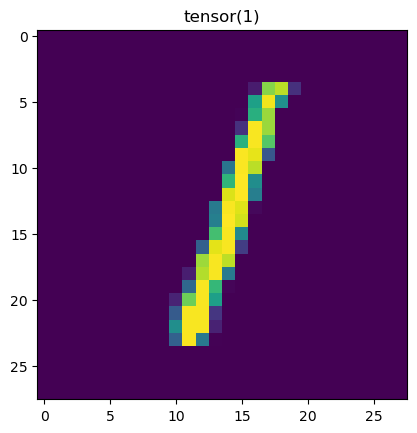

In [7]:
idx = random.randint(0,x.shape[0])
plt.imshow(x[idx])
plt.title(y[idx])

In [8]:
type(x), type(y)

(torch.Tensor, torch.Tensor)

In [9]:
x[0].shape

torch.Size([28, 28])

In [10]:
class FCNN(nn.Module):
    def __init__(self, n=784, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features=n, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=40)
        self.output_layer = nn.Linear(in_features=50, out_features=num_classes)
    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.fc2(x1)
        x3 = self.fc3(x2)
        return self.output_layer(x3)

In [12]:
class MyModel(nn.Module):
    def __init__(self, in_feaure=784, num_classes = 10):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_feaure, out_features=100),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=100, out_features=80),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=80, out_features=50),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=50, out_features=num_classes)
        )

    def forward(self, x):
        return self.seq(x)
model = MyModel(in_feaure=784)
# list(model.parameters()).to(device)

In [13]:
for parameters in model.parameters():
    print(parameters.shape)

torch.Size([100, 784])
torch.Size([100])
torch.Size([80, 100])
torch.Size([80])
torch.Size([50, 80])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [14]:
xa = x[0].type(torch.float32).to(device)
xa = xa.unsqueeze(0)


In [15]:
model(xa)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
with torch.inference_mode():
    print(model(xa))

tensor([[-1.4195,  2.2211,  3.0486,  4.5452,  1.4578,  2.6676, -2.8623,  5.4094,
         -1.2245,  1.7211]], device='cuda:0')


In [ ]:
x_train, y_train = torchvision.datasets.MNIST(root="/media/miju_chowdhury/Miju/Datasets", download=True, train=True)._load_data()
x_test, y_test = torchvision.datasets.MNIST(root="/media/miju_chowdhury/Miju/Datasets", download=True, train=False)._load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [ ]:
x_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
x_train = x_train[:10000].type(torch.float32)
y_train = y_train[:10000].type(torch.LongTensor)

x_test = x_test.type(torch.float32)
y_test = y_test.type(torch.LongTensor)

In [ ]:
model = MyModel(in_feaure=784).to(device)


In [ ]:
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=1e-5)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
import numpy as np

In [ ]:
epochs = 10
batch_size = 64

num_train = x_train.shape[0]
print(num_train)

10000


In [ ]:
def train_epoch(images, labels):
    model.train()
    losses=[]
    num_train = images.shape[0]
    for i in range(0, num_train, batch_size):
        x = images[i:i+batch_size].to(device)
        y = labels[i:i+batch_size].to(device)

        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

In [ ]:
def validation_epoch(images, labels):
    model.eval()
    losses=[]
    num_val = x_test.shape[0]
    for i in range(0, num_val, batch_size):
        x = images[i:i+batch_size].to(device)
        y = labels[i:i+batch_size].to(device)

        with torch.inference_mode():
            y_preds = model(x)
        loss = loss_fn(y_preds, y)

        losses.append(loss.item())
    return np.mean(losses)


In [ ]:
for epoch in range(epochs):
    print(f"Epoch : {epoch+1}/{epochs}")
    train_loss = train_epoch(images=x_train, labels=y_train)
    val_loss = validation_epoch(images=x_test, labels=y_test)
    print(f"Train Loss : {train_loss:0.4f} | Val Loss : {val_loss:0.4f}")

Epoch : 1/10


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
torch.__version__

'2.7.0+cu126'

In [ ]:
!nvidia-smi

Tue May 27 22:42:50 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX130           Off | 00000000:06:00.0 Off |                  N/A |
| N/A   64C    P0              N/A / 200W |     80MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--